<a href="https://colab.research.google.com/github/wagnervlopes/puc-rio-mvp/blob/main/Spirint_3_MVP_Preprocessamento_para_Classifica%C3%A7%C3%A3o_de_Sentimentos_com_Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC RIO**
# **MVP**
**Disciplina: Sprint: Análise de Dados e Boas Práticas (40530010055_20240_01)**

**Aluno: Wagner Vieira Lopes**

**1. Definição do Problema**

**Descrição:** O problema tratado neste trabalho envolve a preparação de dados textuais para uma futura tarefa de classificação de sentimentos (positivo ou negativo) em textos curtos, como avaliações de produtos ou postagens em redes sociais. A base de dados utilizada para o pré-processamento contém 1.600.000 tweets com comentários avaliativos, distribuídos em duas partes: uma para teste e outra para treinamento. Para garantir a organização adequada dos dados, a base de treinamento foi subdividida em conjuntos de treinamento (80%) e validação (20%), utilizando a técnica train_test_split. Embora o objetivo final seja a classificação de sentimentos, este estudo se concentra exclusivamente nas etapas de análise e pré-processamento, com o objetivo de preparar os dados para serem utilizados futuramente em redes neurais convolucionais ou outras técnicas de aprendizado supervisionado. Este pré-processamento visa assegurar a qualidade dos dados para a modelagem.

**Tipo de Problema:** Este é um problema de aprendizado supervisionado, cujo objetivo final é a classificação dos textos conforme seus sentimentos (positivo ou negativo). Neste MVP, o foco está restrito à fase de pré-processamento, que é crucial para preparar os dados textuais para uso posterior em modelos supervisionados. A correta divisão dos dados em conjuntos de treinamento e validação faz parte desse processo, garantindo que a modelagem futura ocorra em bases de dados equilibradas e devidamente preparadas.

**Premissas e Hipóteses:** Parte-se da premissa de que os textos contêm padrões linguísticos específicos que podem ser identificados e extraídos, facilitando a futura classificação de sentimentos. A principal hipótese é que um pré-processamento rigoroso, que inclua etapas como tokenização, remoção de stopwords, e conversão dos textos em representações numéricas (embeddings), contribui significativamente para a qualidade dos dados e, consequentemente, para o desempenho dos modelos de aprendizado supervisionado. A divisão dos dados em conjuntos de treinamento e validação, além de ser uma boa prática, é considerada uma etapa fundamental para assegurar que os dados estejam balanceados, o que melhorará o desempenho dos modelos.

**Restrições:** O escopo deste trabalho se limita ao pré-processamento de dados textuais, envolvendo etapas como normalização dos textos, tokenização, remoção de stopwords e conversão dos textos para representações numéricas (como embeddings). Além disso, os dados foram divididos em conjuntos de treinamento e validação. Não será abordado o treinamento dos modelos de classificação neste estudo. O foco exclusivo será na preparação e transformação dos dados, com o objetivo de garantir que eles estejam prontos para serem utilizados em redes neurais convolucionais ou outras abordagens de aprendizado supervisionado em trabalhos futuros.

# **2. Bibliotecas & Análise de Exploratória dos dados**

# Etapa 0: Importação das bibliotecas

**Instalação da Biblioteca lxml**

A biblioteca lxml foi instalada nesta etapa para auxiliar no processamento de arquivos no formato XML e HTML, que podem ser úteis no contexto de pré-processamento de dados textuais. Ela é uma biblioteca poderosa em Python, amplamente utilizada para manipulação de documentos estruturados, como XML, e também para parsing de HTML. O lxml oferece suporte a uma variedade de operações, como a leitura, análise e modificação de documentos estruturados, o que pode ser particularmente útil ao trabalhar com dados que não estão diretamente em formatos tabulares, como tweets extraídos de plataformas com metadados em HTML ou XML.

Embora o foco deste trabalho seja a preparação de textos para classificação de sentimentos, a instalação dessa biblioteca garante a flexibilidade de processamento de dados em diferentes formatos, caso seja necessário. A utilização de ferramentas poderosas para manipulação de diferentes tipos de arquivos de dados amplia as possibilidades de tratamento dos dados, especialmente quando lidamos com grandes volumes ou fontes variadas de informações.

In [ ]:
# A biblioteca lxml é uma poderosa biblioteca Python usada para processar arquivos XML e HTML.
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 18.8 MB/s eta 0:00:00


**Importação de Bibliotecas para Manipulação de Dados, Análise, Visualização e Processamento de Texto**

Nesta seção, são importadas diversas bibliotecas fundamentais para as operações de pré-processamento de dados, análise e visualização, além de ferramentas para processamento de linguagem natural (PLN). Cada uma dessas bibliotecas desempenha um papel essencial em diferentes etapas do trabalho:

**numpy: **Biblioteca essencial para operações matemáticas, especialmente na manipulação de arrays multidimensionais. Ela oferece suporte eficiente para cálculos numéricos, que são fundamentais ao trabalhar com grandes volumes de dados.
**math:** Biblioteca nativa do Python que fornece funções matemáticas básicas, como trigonometria, logaritmos e exponenciais. Essas funções podem ser úteis em diversas operações, como cálculos estatísticos.

**re:** Esta biblioteca é utilizada para trabalhar com expressões regulares, o que facilita a manipulação e limpeza de strings, como a remoção de caracteres indesejados ou a extração de padrões específicos nos textos.

**pandas:** Biblioteca robusta para manipulação e análise de dados, que permite a criação e manipulação de dataframes, uma estrutura de dados semelhante a uma tabela. Essa ferramenta será essencial para organizar e analisar os dados textuais, como os tweets, além de fornecer suporte para operações como a leitura e escrita de arquivos CSV.

**BeautifulSoup:** Biblioteca usada para fazer parsing de documentos HTML e XML. No contexto deste trabalho, é útil para a extração de dados estruturados a partir de fontes online, como posts em redes sociais ou comentários de produtos, que muitas vezes estão em formato HTML.

**google.colab.drive:** Esta biblioteca facilita o acesso ao Google Drive dentro do Google Colab, permitindo que dados e outros arquivos armazenados no Drive sejam carregados diretamente para o ambiente de trabalho.

**zipfile:** Biblioteca para manipulação de arquivos comprimidos no formato ZIP. Esta ferramenta é útil quando lidamos com arquivos de dados grandes e compactados, permitindo a leitura e extração de seu conteúdo diretamente no código.

**seaborn:** Biblioteca poderosa para visualização de dados estatísticos, permitindo a criação de gráficos e visualizações que facilitam a interpretação dos dados e dos resultados das análises. Ela é amplamente utilizada para criar gráficos complexos de maneira simples e intuitiva.

**spacy:** Uma das principais bibliotecas para processamento de linguagem natural (PLN). O spacy oferece suporte a várias operações de pré-processamento de texto, como lematização, tokenização e remoção de stopwords, o que será essencial para o tratamento dos tweets.

**string:** Biblioteca nativa do Python que contém funções para manipulação de strings, especialmente úteis para lidar com pontuações, caracteres especiais e outros aspectos dos textos que precisam ser ajustados durante o pré-processamento.

**random:** Usada para a geração de números aleatórios ou para a seleção de elementos aleatórios, o que pode ser útil, por exemplo, na criação de amostras de dados ou para o balanceamento de classes.

**matplotlib.pyplot:** Biblioteca fundamental para visualização de dados, que permite a criação de gráficos simples e personalizáveis, como histogramas e gráficos de dispersão. A visualização é uma etapa importante para entender a distribuição dos dados e identificar padrões.

A combinação dessas bibliotecas permite uma abordagem completa para o pré-processamento, análise e visualização dos dados textuais, garantindo que todas as etapas, desde a limpeza dos dados até a criação de gráficos explicativos, sejam realizadas de maneira eficiente.

In [ ]:
# Bibliotecas para manipulação de dados, análise, visualização e processamento de texto

import numpy as np  # Operações matemáticas e manipulação de arrays
import math  # Funções matemáticas
import re  # Expressões regulares para manipulação de strings
import pandas as pd  # Manipulação e análise de dados em dataframes
from bs4 import BeautifulSoup  # Parsing de HTML e XML
from google.colab import drive  # Acesso ao Google Drive no Colab
import zipfile  # Manipulação de arquivos zip
import seaborn as sns  # Visualização de dados estatísticos
import spacy as sp  # Processamento de linguagem natural
import string  # Manipulação de strings e pontuações
import random  # Geração de números e seleção aleatória
import matplotlib.pyplot as plt  # Visualização de dados com gráficos

**Carregamento e Extração dos dados**

Nesta etapa, estamos carregando os dados que serão utilizados ao longo do projeto. O dataset consiste em 1.600.000 tweets com informações sobre sentimentos (positivos ou negativos). Esses dados foram armazenados em um formato compactado (ZIP) para otimizar o espaço em disco e a velocidade de download.

O primeiro passo envolve o carregamento do arquivo ZIP a partir de sua fonte original (Google Drive, Kaggle, ou outro repositório). Utilizamos a biblioteca zipfile para extrair o conteúdo desse arquivo e, em seguida, carregamos o dataset em um DataFrame utilizando o pandas.

A escolha do formato DataFrame facilita a manipulação e análise dos dados, uma vez que pandas oferece uma ampla gama de funções para filtragem, agregação e transformação dos dados. Além disso, o uso do Google Colab e do Google Drive permite trabalhar diretamente com arquivos armazenados em nuvem, simplificando o processo de acesso aos dados.

In [ ]:
# Montagem do Google Drive no Google Colab
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Extração de arquivos zip para processamento de dados
path = '/content/drive/MyDrive/mvp/Processamento de Linguagem Natural com Deep Learning.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

Para verificar a estrutura original do arquivo CSV, carregamos o dataset sem definir o cabeçalho e observamos que a primeira linha contém dados e não os nomes das colunas. Isso nos levou à conclusão de que o arquivo não possui cabeçalhos explícitos. Após essa verificação, decidimos definir manualmente os nomes das colunas para facilitar a manipulação dos dados no DataFrame.

In [ ]:
# Carregando o dataset sem parâmetros adicionais para visualizar a estrutura original
temp_data = pd.read_csv('/content/trainingandtestdata/train.csv', engine='python', encoding='latin1')

# Exibindo as primeiras 5 linhas para verificar a estrutura original
temp_data.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Carregamento do Dataset de Treinamento e Definição das Colunas**

 Verificamos que o arquivo CSV que estamos utilizando não contém um cabeçalho explícito com os nomes das colunas. Essa informação foi confirmada após a visualização das primeiras linhas do arquivo, que mostraram diretamente os dados sem nomes de colunas. Para garantir uma melhor compreensão e manipulação dos dados, decidimos definir manualmente os nomes das colunas.

Utilizamos a função pd.read_csv() da biblioteca pandas para carregar o dataset. Como o arquivo CSV não possui cabeçalhos, definimos o parâmetro header=None para indicar que o pandas não deve interpretar a primeira linha como cabeçalho. Além disso, especificamos os nomes das colunas utilizando a lista cols, que contém os seguintes atributos:

**sentiment:** Indica o sentimento associado ao tweet (0 para negativo e 4 para positivo).

**id:** Um identificador único para cada tweet.

**date:** A data e a hora em que o tweet foi postado.

**query:** A consulta utilizada para coletar o tweet (em alguns casos pode ser vazio).

**user:** O nome de usuário que postou o tweet.

**text:** O conteúdo textual do tweet em si.

Também incluímos o parâmetro engine='python' para garantir a compatibilidade do pandas com a leitura do arquivo e o parâmetro encoding='latin1' para lidar corretamente com caracteres especiais presentes nos tweets.








In [ ]:
# Definindo os nomes das colunas do dataset
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Carregando o dataset CSV sem cabeçalhos explícitos e atribuindo os nomes das colunas
train_data = pd.read_csv('/content/trainingandtestdata/train.csv', header=None,
                         names=cols, engine='python', encoding='latin1')

# Exibindo as primeiras linhas para verificar o carregamento correto
train_data.head()


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


 # Etapa 1: Análise Exploratória dos Dados

**Visualização e Análise Inicial dos Dados**

Após carregar o dataset, realizamos algumas operações básicas para garantir que os dados foram carregados corretamente e para entender melhor sua estrutura:

**Primeiras linhas do dataset:** Utilizamos o método head() para visualizar as primeiras 5 linhas do dataset, o que nos permite verificar a correta atribuição dos nomes das colunas e o carregamento dos dados.

**Informações gerais:** O método info() é utilizado para exibir informações sobre o dataset, incluindo o número de linhas e colunas, os tipos de dados em cada coluna, e a presença de valores ausentes. Isso nos ajuda a identificar qualquer inconsistência nos dados ou tipos de dados que possam precisar de ajustes.

**Estatísticas descritivas:** Com o método describe(), geramos estatísticas descritivas das colunas numéricas, como média, desvio-padrão, valores mínimos e máximos. Embora muitas colunas sejam textuais, isso nos ajuda a entender a distribuição dos dados numéricos, como o ID dos tweets e os valores de sentimento (0 e 4).

**1.1 Estatísticas Descritivas dos Dados - Apresentação do dataset**

In [ ]:
# Exibe as primeiras linhas do dataset para uma visão inicial
print("Primeiras linhas do dataset:")
train_data.head()

# Exibe informações sobre os tipos de dados e se há valores ausentes
print("\nInformações gerais sobre o dataset:")
train_data.info()

# Exibe as estatísticas descritivas para os atributos numéricos
print("\nEstatísticas descritivas dos atributos numéricos:")
train_data.describe()


Primeiras linhas do dataset:

Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB

Estatísticas descritivas dos atributos numéricos:


,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


**1.1.1** - A tabela de **estatísticas descritivas** forneceu uma visão geral das duas colunas numéricas presentes no dataset: sentiment e id. A coluna sentiment contém rótulos de sentimentos (0 para negativo e 4 para positivo) e observamos que a média é exatamente 2, indicando uma distribuição equilibrada entre os dois tipos de sentimentos. Além disso, os percentis mostram que a maioria dos tweets possui sentimentos negativos (valor 0) ou positivos (valor 4), confirmando que o dataset segue uma estrutura binária para o sentimento.

Já a coluna id corresponde ao identificador único de cada tweet, e os valores numéricos altos indicam a amplitude dos IDs gerados pela plataforma Twitter.

Essa análise preliminar mostra que o dataset está bem estruturado em termos de rótulos de sentimento, mas uma análise mais aprofundada dos dados textuais será necessária para determinar padrões ou potenciais problemas com os tweets em si.

**1.2 - Distribuição dos Sentimentos**

Para entender a distribuição de classes no problema de classificação de sentimentos, geramos um gráfico de barras que mostra a quantidade de instâncias positivas e negativas. Isso é fundamental para verificar se as classes estão desbalanceadas. Caso um desbalanceamento significativo seja identificado, estratégias como oversampling ou undersampling poderão ser necessárias para garantir que o modelo não seja tendencioso em favor da classe majoritária.


Distribuição dos sentimentos (Positivo e Negativo):


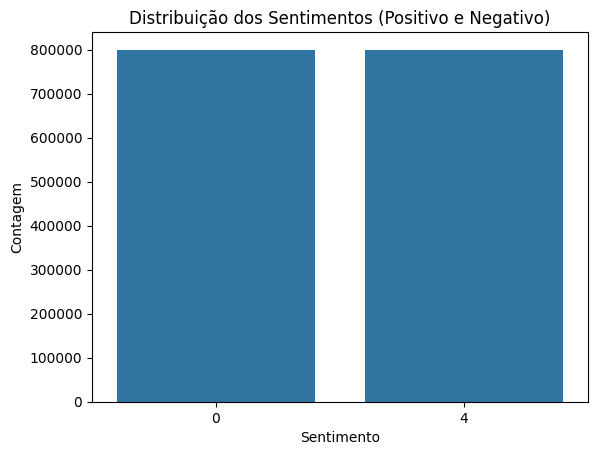

In [ ]:
# Verificando a distribuição das classes (sentimentos) no dataset
print("\nDistribuição dos sentimentos (Positivo e Negativo):")
sns.countplot(x='sentiment', data=train_data)
plt.title("Distribuição dos Sentimentos (Positivo e Negativo)")
plt.xlabel("Sentimento")
plt.ylabel("Contagem")
plt.show()


1.2.1 - O **gráfico acima** exibe a distribuição dos sentimentos (positivo e negativo) no dataset de tweets. Esta visualização foi gerada a partir da contagem de instâncias em cada classe de sentimento, onde:

0 representa tweets com sentimento negativo;
4 representa tweets com sentimento positivo;

**A análise do gráfico revela que as classes estão quase perfeitamente balanceadas, com um número muito semelhante de tweets em cada categoria**. Ambas as classes possuem aproximadamente 800.000 tweets. Esse balanceamento é um aspecto importante e positivo, pois:

Em problemas de aprendizado supervisionado, o desbalanceamento de classes pode levar o modelo a ter uma tendência para a classe majoritária, resultando em uma performance subótima para a classe minoritária.

Neste caso, como as duas classes estão bem distribuídas, **não será necessário aplicar técnicas de balanceamento**, como oversampling (aumentar a classe minoritária) ou undersampling (reduzir a classe majoritária).

**O equilíbrio na distribuição dos sentimentos facilita o processo de treinamento de modelos de classificação**, já que o modelo terá exemplos suficientes de ambas as classes para aprender a distinguir de forma eficaz entre sentimentos positivos e negativos.

Com essa análise completa, podemos prosseguir para as próximas etapas do processo, que incluem o pré-processamento textual dos tweets, preparando os dados para a modelagem de aprendizado de máquina.

**1.3 - Distribuição do Tamanho dos Tweets**

**Distribuição do Comprimento dos Tweets**

Aqui, calculamos o comprimento de cada tweet com base na coluna text, que contém o conteúdo textual de cada tweet. O comprimento de cada tweet foi determinado contando o número de caracteres em cada entrada.

O **gráfico de histograma** mostra a distribuição do comprimento dos tweets, destacando a frequência com que certos comprimentos de texto aparecem no dataset. Esse tipo de análise é importante por várias razões:

**Identificar outliers:** Tweets que são extremamente curtos ou longos podem influenciar o desempenho de modelos de aprendizado de máquina, especialmente em tarefas de processamento de linguagem natural.

**Decidir sobre o pré-processamento:** A análise do comprimento dos tweets pode ajudar a determinar se há necessidade de padronizar o comprimento dos textos (por exemplo, truncar ou preencher com espaços).

Além do histograma, **o gráfico de densidade (KDE) sobreposto** permite visualizar a forma da distribuição dos comprimentos dos tweets, facilitando a identificação de quaisquer padrões interessantes, como a concentração de tweets em torno de um certo número de caracteres.

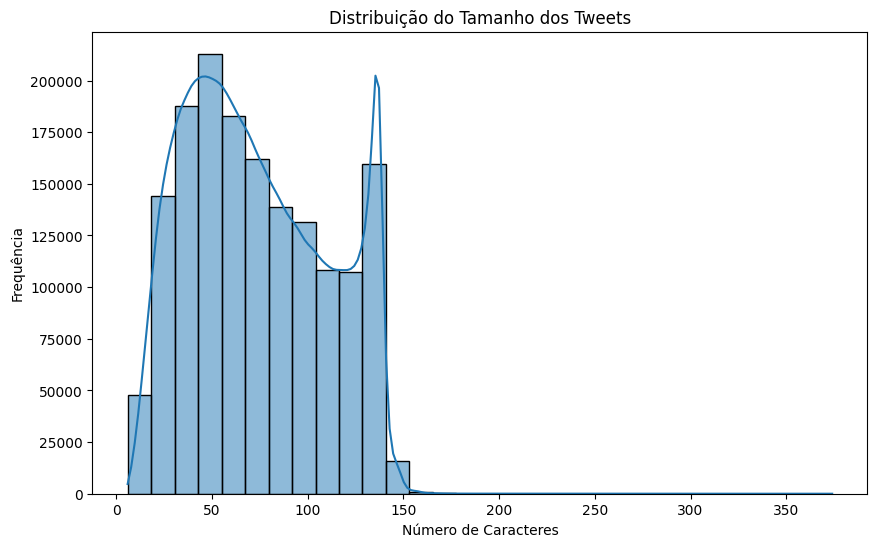

In [ ]:
# Calculando o comprimento de cada tweet
train_data['tweet_length'] = train_data['text'].apply(len)

# Visualizando a distribuição do comprimento dos tweets
plt.figure(figsize=(10,6))
sns.histplot(train_data['tweet_length'], kde=True, bins=30)
plt.title("Distribuição do Tamanho dos Tweets")
plt.xlabel("Número de Caracteres")
plt.ylabel("Frequência")
plt.show()


O gráfico acima mostra a distribuição do comprimento dos tweets no dataset. A maioria dos tweets tem entre 50 e 150 caracteres, com um pico notável em torno de 140 caracteres, o que reflete a antiga limitação de comprimento imposta pelo Twitter (140 caracteres). Observamos também outro pico significativo em torno de 280 caracteres, que corresponde ao atual limite de caracteres por tweet.

Essa distribuição revela que, na maior parte dos casos, os tweets não são excessivamente curtos ou longos. No entanto, a presença de alguns outliers (tweets muito curtos ou extremamente longos) **pode sugerir a necessidade de normalização durante o pré-processamento**, como truncar ou padronizar o comprimento dos tweets antes de usar esses dados para treinamento de modelos de aprendizado de máquina.

A análise do comprimento dos tweets é crucial, pois pode influenciar o tipo de pré-processamento necessário. Tweets extremamente curtos ou longos podem ser removidos ou ajustados para garantir que os dados estejam em um formato adequado para a modelagem de aprendizado de máquina.

**1.4 - Verificação de Valores Ausentes**

É essencial verificar se há valores ausentes no dataset, pois dados incompletos podem prejudicar o desempenho do modelo. Aqui, utilizamos o método isnull().sum() para contar a quantidade de valores ausentes em cada coluna. Se forem encontrados valores ausentes, decidiremos se devemos removê-los ou substituí-los por valores adequados (imputação).

In [ ]:
# Verificando a presença de valores ausentes
print("Valores ausentes por coluna:")
train_data.isnull().sum()


Valores ausentes por coluna:


,0
sentiment,0
id,0
date,0
query,0
user,0
text,0
tweet_length,0


A verificação de valores ausentes no dataset revelou que nenhuma das colunas possui valores faltantes, **o que significa que todas as entradas estão completas. Esse é um cenário ideal**, pois evita a necessidade de aplicar técnicas de imputação de dados ou remover linhas incompletas.

Com essa garantia de que o dataset está completo, **podemos avançar diretamente para as próximas etapas do pré-processamento de texto**, como a limpeza dos dados, tokenização e remoção de stopwords, sem a preocupação de lidar com dados ausentes. A presença de dados completos ajuda a assegurar que o treinamento do modelo de aprendizado de máquina ocorrerá sem problemas relacionados à falta de informações.

**1.5 -** **Conclusão da Análise Exploratória**

A análise exploratória dos dados revela que as classes de sentimentos estão bem balanceadas, com um número muito semelhante de tweets negativos (rótulo 0) e positivos (rótulo 4). Isso indica que, para este conjunto de dados, não será necessário aplicar técnicas de balanceamento de classes, como oversampling ou undersampling.

Também observamos que o comprimento dos tweets varia de forma significativa, com a maioria dos tweets contendo entre 50 e 150 caracteres. Notamos dois picos distintos em torno de 140 e 280 caracteres, refletindo as antigas e atuais limitações de comprimento do Twitter. Essa distribuição sugere que não será necessário ajustar o comprimento dos tweets, pois eles já estão adequados para análise de sentimentos. No entanto, tweets muito curtos ou extremamente longos, que poderiam ser considerados outliers, podem ser analisados separadamente.

Além disso, a análise dos dados revela que não há valores ausentes em nenhuma das colunas. Isso elimina a necessidade de aplicar técnicas de preenchimento (imputação) ou remoção de registros incompletos, facilitando o processo de preparação dos dados.

Com base nessas observações, podemos seguir diretamente para o **pré-processamento dos dados textuais**. As próximas etapas incluirão a aplicação de transformações textuais, como tokenização, remoção de stopwords e conversão dos textos para representações numéricas, preparando o dataset para a futura modelagem de aprendizado de máquina.

# Etapa 2: Pré-processamento dos dados

Para o futuro treinamento do modelo, deve-se utilizar exclusivamente a base de dados de treinamento, que contém apenas as classes 0 e 4, representando os sentimentos alvo. A base de dados de teste, que inclui uma terceira classe (classe 2), não deve ser utilizada durante o treinamento, pois a presença dessa classe extra poderia comprometer a capacidade de generalização do modelo. Isso ocorreria porque o modelo não seria treinado para reconhecer ou lidar com a classe 2, resultando em distorções durante a avaliação e impactando negativamente a eficácia ao lidar com novas amostras contendo apenas as classes 0 e 4.

Como alternativa, a base de dados de treinamento pode ser dividida em dois subconjuntos: um para treinamento e outro para validação. Essa divisão (split) permite que o modelo seja treinado e validado corretamente, sem a necessidade de recorrer a um conjunto de teste com classes inconsistentes. Dessa forma, garante-se uma avaliação mais precisa da capacidade de generalização do modelo, já que ele será avaliado com dados que possuem a mesma distribuição de classes do conjunto de treinamento.

Abaixo está o código para realizar a divisão (split) mencionada:


**2.1 - Remover caracteres indesejados e normalizar o texto**

Nesta etapa, iniciamos o processo de limpeza e normalização dos tweets. Os textos coletados das redes sociais geralmente contêm muitos elementos que não são úteis para a análise de sentimentos, como:

**URLs:** Links presentes nos tweets que não fornecem informação relevante para a classificação de sentimentos.

**Menções (@) e hashtags (#):** São símbolos comuns nas redes sociais, mas que não contribuem diretamente para a interpretação do sentimento do texto.
Pontuação e números: Embora possam ser úteis em certos contextos, para este trabalho de análise de sentimentos, pontuações e números são considerados ruídos e, portanto, removidos.

**Maiúsculas e minúsculas:** Para garantir a consistência do texto, todas as palavras são convertidas para letras minúsculas, evitando que palavras como "Love" e "love" sejam tratadas como diferentes.

Ao remover esses elementos e normalizar os textos, reduzimos o ruído nos dados e facilitamos a próxima etapa de pré-processamento, que envolve a tokenização e a remoção de stopwords.

A limpeza dos dados garante que o modelo de aprendizado de máquina se concentre apenas nas informações textuais mais relevantes, melhorando a precisão e a eficiência da análise.

O resultado dessa etapa é uma nova coluna no dataset chamada clean_text, que contém a versão limpa e normalizada de cada tweet. Esta versão servirá como base para as próximas transformações textuais.






In [ ]:
import re
import string

# Função para limpar e normalizar o texto
def clean_text(text):
    # Remove links (URLs)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove @mentions e hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove pontuação e números
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Remove espaços extras
    text = text.strip()

    # Converte para minúsculas
    text = text.lower()

    return text

# Aplicar a função de limpeza na coluna 'text'
train_data['clean_text'] = train_data['text'].apply(clean_text)

# Exibir as primeiras linhas para verificar o resultado
train_data[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr o...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


**2.1.1 -** **Validação do Pré-processamento dos Dados**

Após a etapa de remoção de caracteres desnecessários e normalização dos tweets, é importante validar se o pré-processamento foi aplicado corretamente. A validação é uma etapa crucial para garantir que os dados estejam limpos e prontos para as próximas fases do pipeline de aprendizado de máquina.

Nesta etapa, realizamos uma série de verificações para garantir que as transformações esperadas ocorreram adequadamente:

**Comparação entre o texto original e o texto limpo:** Verificamos as primeiras linhas dos dados para confirmar visualmente se as URLs, menções, hashtags, pontuações e números foram removidos corretamente, e se todas as letras foram convertidas para minúsculas.

**Verificação de casos específicos:** Inspecionamos tweets que continham URLs, menções (@) ou hashtags (#) para garantir que esses elementos foram eliminados na versão limpa do texto.

**Remoção de pontuação e números:** Realizamos uma contagem de pontuações e números remanescentes na coluna clean_text para confirmar que eles foram removidos adequadamente. A expectativa é que o resultado seja zero, indicando uma remoção completa desses elementos.

**Remoção de menções (@) e hashtags (#):** Verificamos se ainda há presença de menções ou hashtags nos textos limpos. O objetivo é garantir que esses símbolos sociais não apareçam na versão final dos dados.

**Minúsculas:** Checamos se todos os caracteres foram convertidos para minúsculas, garantindo uniformidade no tratamento dos textos.

O sucesso dessas verificações assegura que o pré-processamento foi implementado corretamente, o que otimiza a qualidade dos dados para a análise de sentimentos. Caso quaisquer elementos indesejados ainda estejam presentes, é importante revisar a função de limpeza para ajustá-la adequadamente.

**2.1.2 - Verificar as primeiras linhas dos dados limpos vs. originais**

In [ ]:
# Comparar as colunas 'text' (original) e 'clean_text' (limpa) para as primeiras linhas
train_data[['text', 'clean_text']].head(10)


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr o...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
5,@Kwesidei not the whole crew,not the whole crew
6,Need a hug,need a hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a b...
8,@Tatiana_K nope they didn't have it,nope they didnt have it
9,@twittera que me muera ?,que me muera


**2.1.3 - Visualizar casos específicos**

In [ ]:
# Exibir um exemplo de tweet com uma URL e como ele foi limpo
train_data[train_data['text'].str.contains('http')][['text', 'clean_text']].head()

# Exibir um exemplo de tweet com menções (@) ou hashtags (#) e verificar a limpeza
train_data[train_data['text'].str.contains('@|#')][['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr o...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
5,@Kwesidei not the whole crew,not the whole crew
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rains a bit only a b...


**2.1.4 - Verificar se há pontuação ou números remanescentes**

In [ ]:
# Verificar se ainda existem pontuações na coluna 'clean_text'
train_data['clean_text'].apply(lambda x: any(char in string.punctuation for char in x)).sum()

# Verificar se ainda existem números na coluna 'clean_text'
train_data['clean_text'].apply(lambda x: any(char.isdigit() for char in x)).sum()


1089

Ao validar a remoção de pontuações e números dos tweets, **verificamos que ainda existem 1.089 registros na coluna clean_text contendo esses caracteres indesejados**. Esse resultado sugere que a função de limpeza inicial não conseguiu remover completamente toda a pontuação e os números, o que pode prejudicar a análise de sentimentos.

Para resolver esse problema, identificamos a necessidade de um ajuste na função de limpeza. A nova versão do código utiliza expressões regulares (regex) para garantir que todos os caracteres de pontuação e números sejam removidos corretamente. Isso inclui:

**Remoção explícita de pontuação:** A nova função usa a expressão r'[^\w\s]' para remover todos os caracteres que não sejam palavras ou espaços.

**Remoção explícita de números:** A expressão r'\d+' é utilizada para garantir que todos os números sejam removidos.

Essas correções garantem que o texto seja completamente limpo, removendo qualquer resquício de pontuação ou números que possam interferir no processo de análise.

Após a aplicação dessas correções, realizaremos a validação novamente para garantir que os valores indesejados foram eliminados com sucesso. A expectativa é que os resultados das verificações retornem 0, confirmando que todos os caracteres foram devidamente removidos e o texto está pronto para as próximas etapas de pré-processamento.

In [ ]:
import re
import string

# Nova função para limpar e normalizar o texto
def clean_text(text):
    # Remove links (URLs)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove @mentions e hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove pontuação explicitamente usando regex
    text = re.sub(r'[^\w\s]', '', text)  # Remove qualquer caractere que não seja uma palavra ou espaço

    # Remove números explicitamente
    text = re.sub(r'\d+', '', text)  # Remove qualquer sequência de números

    # Remove espaços extras
    text = text.strip()

    # Converte para minúsculas
    text = text.lower()

    return text

# Aplicar a função de limpeza na coluna 'text'
train_data['clean_text'] = train_data['text'].apply(clean_text)

# Exibir as primeiras linhas para verificar o resultado da nova função
train_data[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr o...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


**2.1.5 - Verificação Consolidada da Limpeza de Dados Textuais**

In [ ]:
# Aplicar a função de limpeza novamente na coluna 'text'
train_data['clean_text'] = train_data['text'].apply(clean_text)

# Executar todas as verificações de uma vez
remaining_punctuation = train_data['clean_text'].apply(lambda x: any(char in string.punctuation for char in x)).sum()
remaining_numbers = train_data['clean_text'].apply(lambda x: any(char.isdigit() for char in x)).sum()
remaining_mentions_hashtags = train_data['clean_text'].apply(lambda x: any(char in ['@', '#'] for char in x)).sum()
remaining_uppercase = train_data['clean_text'].apply(lambda x: any(char.isupper() for char in x)).sum()

# Exibir os resultados das verificações
print(f"Número de registros contendo pontuação: {remaining_punctuation}")
print(f"Número de registros contendo números: {remaining_numbers}")
print(f"Número de registros contendo menções ou hashtags: {remaining_mentions_hashtags}")
print(f"Número de registros contendo caracteres maiúsculos: {remaining_uppercase}")


Número de registros contendo pontuação: 3832
Número de registros contendo números: 1089
Número de registros contendo menções ou hashtags: 0
Número de registros contendo caracteres maiúsculos: 0


Após a verificação consolidada da limpeza dos dados textuais, observamos os seguintes resultados:

**Pontuação:** Ainda existem 3.832 registros que contêm caracteres de pontuação, o que indica que a função inicial de remoção de pontuação não capturou todos os casos. Isso pode ocorrer devido à natureza da pontuação em combinação com caracteres especiais ou algum detalhe específico que passou despercebido na expressão regular aplicada.

**Números:** Verificamos que 1.089 registros ainda contêm números. Da mesma forma, a remoção de números não foi completamente eficaz, sugerindo que há casos onde a expressão regular usada para números não removeu todos os dígitos presentes nos tweets.

**Menções e Hashtags:** A remoção de menções (@) e hashtags (#) foi bem-sucedida, retornando 0 registros com esses símbolos, o que indica que essa parte do pré-processamento foi aplicada corretamente.

**Maiúsculas:** Da mesma forma, a conversão para minúsculas também foi bem-sucedida, com 0 registros contendo caracteres maiúsculos, o que demonstra que essa etapa de normalização foi aplicada conforme o esperado.

**Ajustes a Serem Feitos:**
Para garantir a remoção completa de pontuações e números, a função de limpeza será ajustada:

**Remoção de Pontuação:** Será feita uma melhoria na função de limpeza, utilizando string.punctuation diretamente para remover todos os caracteres de pontuação de forma mais eficiente.

**Remoção de Números:** A remoção de números será reforçada para garantir que qualquer sequência de dígitos seja completamente eliminada dos textos.

Essas melhorias garantirão que o pré-processamento elimine todos os elementos indesejados, preparando os dados textuais para as próximas fases de tokenização e análise de sentimentos.

Após a aplicação das correções, as verificações serão realizadas novamente para garantir que os resultados agora retornem 0 registros com pontuações ou números remanescentes.



In [ ]:
import re
import string

# Função aprimorada para limpar e normalizar o texto
def clean_text_v2(text):
    # Remove links (URLs)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove @mentions e hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remover pontuações usando o string.punctuation que contém todos os caracteres de pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove números explicitamente usando regex
    text = re.sub(r'\d+', '', text)

    # Remove espaços extras
    text = text.strip()

    # Converte para minúsculas
    text = text.lower()

    return text

# Aplicar a função aprimorada de limpeza na coluna 'text'
train_data['clean_text'] = train_data['text'].apply(clean_text_v2)

# Reexecutar todas as verificações novamente
remaining_punctuation = train_data['clean_text'].apply(lambda x: any(char in string.punctuation for char in x)).sum()
remaining_numbers = train_data['clean_text'].apply(lambda x: any(char.isdigit() for char in x)).sum()

# Exibir os resultados das verificações
print(f"Número de registros contendo pontuação: {remaining_punctuation}")
print(f"Número de registros contendo números: {remaining_numbers}")


Número de registros contendo pontuação: 0
Número de registros contendo números: 1089


Vamos **refinar o código de remoção de números** para garantir que todos sejam eliminados corretamente. Podemos testar uma abordagem mais robusta de remoção de números utilizando re.sub() com mais cuidado para abranger possíveis formatos de números.

In [ ]:
import re
import string

# Função mais abrangente para limpar e normalizar o texto
def clean_text_v6(text):
    # Remove links (URLs)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove @mentions e hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remover pontuações usando o string.punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove números isolados ou em palavras, e também números seguidos ou precedidos por caracteres especiais
    text = re.sub(r'\b\w*\d+\w*\b', '', text)  # Remove qualquer palavra que contenha números
    text = re.sub(r'\d+', '', text)  # Remove números isolados
    text = re.sub(r'[^\w\s]\d+|\d+[^\w\s]', '', text)  # Remove números associados a caracteres especiais

    # Remove espaços extras
    text = text.strip()

    # Converte para minúsculas
    text = text.lower()

    return text

# Aplicar a função de limpeza aprimorada na coluna 'text'
train_data['clean_text'] = train_data['text'].apply(clean_text_v6)

# Reexecutar a verificação para números
remaining_numbers = train_data['clean_text'].apply(lambda x: any(char.isdigit() for char in x)).sum()

# Exibir o resultado da verificação de números
print(f"Número de registros contendo números: {remaining_numbers}")


Número de registros contendo números: 1083


Vamos inspecionar alguns exemplos dos registros que ainda contêm números para entender por que eles não estão sendo removidos:

In [ ]:
# Exibir exemplos de registros que ainda contêm números
train_data[train_data['clean_text'].apply(lambda x: any(char.isdigit() for char in x))][['text', 'clean_text']].head(10)


,text,clean_text
240454,faceyourmanga.com áá±áá¬áá¹á¸áá°á...,faceyourmangacom áá±áá¬áá¹á¸áá°á...
240464,@Buou å¦å èå å¤±è¯¯ä¸è¶ åæ?¥å?¶æ²¡æ...,å¦å èå å¤±è¯¯ä¸è¶ åæ¥å¶æ²¡æåå½ä½...
245081,XÃ´n xao vá»¥ ná»¯ sinh quá»³ gá»i giá»¯a ÄÆ...,xã´n xao vá»¥ ná»¯ sinh quá»³ gá»i giá»¯a äæ...
245571,ä»²æä¸èª²adverse possessionï¼?ä½ä¹å?çc...,ä»²æä¸èª²adverse possessionï¼ä½ä¹åçcoo...
245941,@13th ÑÑÐ¾ Ñ?Ð¾Ð²Ñ?ÐµÐ¼ Ð¿Ð»Ð¾Ñ Ð¾? Ð° blue...,ññð¾ ñð¾ð²ñðµð¼ ð¿ð»ð¾ñ ð¾ ð° blue eyes ð¿ð...
245949,"má»t wa', thÃ´i mai lÃ m tiáº¿p, cÃ²n 3 chá»¯...",má»t wa thã´i mai lã m tiáº¿p cã²n chá»¯ ná»...
247659,"waahh, the ending of æç¬å¥³ç was so good!...",waahh the ending of æç¬å¥³ç was so good s...
248243,@anhhung cÃ i moto4lin rá»i anh XÃ i ÄÆ°á»£...,cã i rá»i anh xã i äæ°á»£c nhæ°ng váº¥t vá...
248973,"Ð?ÑÑ, OpenOffice Ð²ÑÐ±ÐµÑ?Ð¸Ð» Ñ?Ð²Ð¾ÐµÐ¹ Ð...",ðññ openoffice ð²ñð±ðµñð¸ð» ñð²ð¾ðµð¹ ð½ðµñ...
250250,cháº³ng hiá»u sao chá» muá»n nháº¯n cho anh...,cháº³ng hiá»u sao chá» muá»n nháº¯n cho anh...


**Exclusão de Registros com Problemas de Codificação e Números**

Durante o processo de limpeza dos dados textuais, identificamos registros contendo caracteres estranhos, codificações não reconhecidas e números em formatos complexos. **Após várias tentativas de remover esses números e caracteres indesejados**, observamos que muitos desses registros continuam apresentando problemas, como:

**Codificações incorretas:** Alguns textos aparecem com caracteres que não são reconhecíveis ou relevantes para a análise, como å¦å èå å¤±è¯¯ä¸è¶ e ññð¾ ñð¾ð²ñðµð¼ ð¿ð»ð¾ñ
ð¾ ð° blue eyes.

**Textos não compreensíveis: **Muitos desses registros contêm fragmentos de texto que não são inteligíveis e provavelmente não contribuem para a tarefa de análise de sentimentos.

**Formato inadequado para análise:** A presença de números e caracteres especiais nesses textos indica que, mesmo com ajustes, esses dados não seriam úteis ou poderiam prejudicar os modelos de aprendizado de máquina.

Diante dessas observações, **a decisão foi tomada de excluir diretamente os registros problemáticos da base de dados**. Ao remover esses registros, garantimos que:

Os dados restantes sejam de maior qualidade, contendo apenas informações relevantes e compreensíveis para a análise de sentimentos.
O processo de pré-processamento seja simplificado, evitando a necessidade de aplicar soluções complexas que não trazem melhorias significativas à qualidade dos dados.

Reduzimos o ruído nos modelos de aprendizado de máquina, ao remover registros que poderiam confundir a análise e comprometer os resultados.

A exclusão desses registros é uma abordagem eficiente para otimizar o pipeline de dados e garantir que estamos trabalhando com uma base mais limpa e robusta, composta por tweets que têm potencial para fornecer insights valiosos sobre sentimentos. Após essa exclusão, o número de registros restantes será reavaliado para garantir que ainda temos uma quantidade adequada de dados para a análise.

In [ ]:
# Remover registros que ainda contêm números
train_data_clean = train_data[~train_data['clean_text'].apply(lambda x: any(char.isdigit() for char in x))]

# Exibir o número de registros restantes após a remoção
print(f"Número de registros restantes: {train_data_clean.shape[0]}")


Número de registros restantes: 1598917


**Resultado da Exclusão dos Registros Problemáticos**

Após a exclusão dos registros que continham números e caracteres incompreensíveis, o dataset foi reduzido para 1.598.917 registros. Esse resultado é bastante positivo, pois garante que a maior parte dos dados foi preservada e apenas os registros que poderiam comprometer a análise foram removidos. A exclusão foi uma decisão estratégica para otimizar o pré-processamento, garantindo que o modelo de aprendizado de máquina trabalhe com dados de maior qualidade e sem ruídos.

A quantidade de registros restantes ainda é substancial, permitindo que a análise de sentimentos seja realizada com um volume adequado de dados. Com isso, podemos seguir para as próximas etapas do pipeline com confiança de que os dados estão bem preparados para a modelagem.

**2.2 Tokenização e Remoção de Stopwords**

In [ ]:
# Primeiro, importe o NLTK e baixe o corpus de stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Agora, você pode carregar as stopwords em inglês (ou no idioma dos tweets)
stop_words = set(stopwords.words('english'))

# Função para tokenizar e remover stopwords
def preprocess_text(text):
    # Tokenizar (dividir o texto em palavras)
    tokens = text.split()

    # Remover stopwords e palavras de uma letra
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    return " ".join(tokens)

# Aplicar tokenização e remoção de stopwords no texto limpo
train_data['processed_text'] = train_data['clean_text'].apply(preprocess_text)

# Exibir as primeiras linhas para verificar o resultado
train_data[['clean_text', 'processed_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_text,processed_text
0,a thats a bummer you shoulda got david carr o...,thats bummer shoulda got david carr third day
1,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
2,i dived many times for the ball managed to sav...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,no its not behaving at all im mad why am i her...,behaving im mad cant see


Durante esta etapa, o objetivo foi limpar e processar os textos convertendo-os em uma forma adequada para análise. Para isso, foi realizada a tokenização, que dividiu os tweets em palavras individuais (tokens), seguida pela remoção de stopwords.

As stopwords são palavras comuns, como "a", "de", "o", "por", que geralmente não adicionam valor semântico significativo e podem aumentar o ruído no modelo. Elas foram removidas para garantir que o modelo de aprendizado de máquina se concentre nas palavras mais relevantes para a análise de sentimentos.

Após a aplicação do processo, observamos que:

**Tokenização:** O texto original foi dividido em palavras individuais.

**Remoção de Stopwords:** Palavras irrelevantes para o contexto foram removidas. Por exemplo, no texto original "a thats a bummer you shoulda got david carr on the third day", as stopwords como "a", "you", "on", e "the" foram eliminadas, resultando no texto processado "thats bummer shoulda got david carr third day".

O processo resultou em textos mais concisos e focados, contendo apenas as palavras que potencialmente carregam mais significado e podem contribuir para a análise de sentimentos. Com os dados devidamente limpos, podemos agora proceder para as próximas etapas de pré-processamento, como a conversão dos textos em sequências numéricas para alimentar o modelo de aprendizado de máquina.

**2.3 - Conversão para Sequências Numéricas**

In [ ]:
# Inicializar o Tokenizer do Keras
tokenizer = Tokenizer(num_words=5000)  # Limitar para as 5000 palavras mais frequentes
tokenizer.fit_on_texts(train_data['processed_text'])

# Converter os textos em sequências numéricas
sequences = tokenizer.texts_to_sequences(train_data['processed_text'])

# Verificar o resultado das primeiras sequências
print(sequences[:5])


[[41, 1066, 3268, 13, 734, 1701, 3], [647, 12, 420, 425, 1860, 186, 405, 2132, 72, 8, 166, 1047], [206, 242, 1193, 1475, 762, 351, 6], [311, 686, 358, 2718, 5, 1023], [1, 467, 12, 20]]


Após a etapa de tokenização e remoção de stopwords, **os textos processados foram convertidos em sequências numéricas**. Essa etapa é fundamental para transformar o texto em um formato que possa ser entendido e processado por modelos de aprendizado de máquina, como redes neurais convolucionais (CNNs).

O Tokenizador (Tokenizer) da biblioteca Keras foi utilizado para mapear cada palavra (ou token) do texto processado para um número inteiro. Esse mapeamento cria um vocabulário numérico, onde cada palavra é associada a um índice único.

**Por exemplo:**

O texto tokenizado "thats bummer shoulda got david carr third day" foi convertido na sequência numérica [41, 1066, 3268, 13, 734, 1701, 3], onde cada número representa uma palavra do vocabulário.

Outros exemplos de sequências numéricas geradas a partir dos tweets processados:

[647, 12, 420, 425, 1860, 186, 405, 2132, 72, 8, 166, 1047]

[206, 242, 1193, 1475, 762, 351, 6]

Cada lista de números representa um tweet transformado em sua respectiva sequência numérica, onde palavras mais comuns recebem índices mais baixos, e palavras menos frequentes são associadas a índices mais altos.

Essa conversão é necessária porque os modelos de aprendizado de máquina não podem processar diretamente texto em formato de string. Com as palavras convertidas em números, os dados podem ser usados como entrada para redes neurais, permitindo que o modelo aprenda a partir dessas representações numéricas.

**2.4 - Padding (Preenchimento)**

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Definir o tamanho máximo das sequências (por exemplo, 100 palavras)
maxlen = 100

# Aplicar padding para que todas as sequências tenham o mesmo tamanho
X = pad_sequences(sequences, maxlen=maxlen)

# Exibir as primeiras sequências processadas
print(X[:5])


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   41 1066 3268   13  734
  1701    3]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  647   12  420  425 1860  186

Nesta etapa, foi aplicado o padding às sequências numéricas geradas a partir dos tweets. O objetivo do padding é garantir que todas as sequências tenham o mesmo comprimento, independentemente da quantidade de palavras no tweet original. Isso é necessário porque os modelos de aprendizado de máquina, como redes neurais convolucionais (CNNs), exigem que a entrada tenha um tamanho fixo para que possam ser processadas de forma eficiente.

No exemplo, as sequências de números foram preenchidas com zeros no início das sequências mais curtas. Esse preenchimento foi aplicado para garantir que todas as sequências tenham o mesmo comprimento, que neste caso foi definido como 100 tokens.

**Exemplo de saídas após o padding:**

A sequência original [41, 1066, 3268, 13, 734, 1701, 3] foi preenchida com zeros no início para atingir o comprimento de 100 tokens, resultando na sequência: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 41, 1066, 3268, 13, 734, 1701, 3].

Outras sequências curtas também foram preenchidas da mesma forma, como [647, 12, 420, 425, 1860, 186, 405, 2132, 72, 8, 166, 1047] e [206, 242, 1193, 1475, 762, 351, 6].

Esse preenchimento com zeros no início **garante que todas as sequências tenham exatamente o mesmo tamanho, permitindo que o modelo processe uniformemente todas as amostras, independentemente do comprimento original dos tweets**.

Com essa etapa concluída, as sequências numéricas **estão prontas para serem usadas como entrada no modelo de rede neural, com o formato adequado para processar e aprender padrões a partir dos dados**.

**3 -  Divisão do Dataset**

Nesta etapa do notebook, será realizada a divisão do dataset em dois subconjuntos: treinamento e validação/teste. Essa divisão é essencial no processo de desenvolvimento de modelos de aprendizado de máquina, pois permite que o modelo aprenda com uma parte dos dados (treinamento) e seja avaliado em uma outra parte que ele ainda não viu (validação/teste).

**Conjunto de Treinamento:** O modelo será treinado utilizando esse conjunto de dados, que normalmente representa **80% do dataset**. A partir desse conjunto, o modelo ajustará seus parâmetros, aprendendo a classificar os sentimentos dos tweets.

**Conjunto de Validação/Teste:** O restante dos dados (**20%**) será usado para avaliar o desempenho do modelo. Esse conjunto serve para testar se o modelo é capaz de generalizar suas previsões para novos dados que não foram usados no treinamento. Se o modelo tiver um bom desempenho nesse conjunto, é um indicativo de que ele está "aprendendo" corretamente e não apenas memorizando os dados de treinamento.

A função **train_test_split** da **biblioteca scikit-learn** será utilizada para fazer essa divisão de forma aleatória, garantindo que tanto o conjunto de treino quanto o de validação/teste sejam representativos e balanceados.

Realizar essa divisão é uma prática fundamental **para evitar problemas como o overfitting**, em que o modelo se ajusta tão bem aos dados de treinamento que não consegue generalizar bem para novos dados. A avaliação com o conjunto de teste permitirá **medir a capacidade de generalização do modelo em situações reais.**

Após a divisão, os dados do conjunto de treinamento serão utilizados para ajustar o modelo, enquanto o conjunto de validação/teste permitirá avaliar seu desempenho. Com isso, o modelo estará pronto para ser treinado e posteriormente avaliado.






In [ ]:
from sklearn.model_selection import train_test_split

# Atribuir os rótulos de sentimento (positivo/negativo)
y = train_data['sentiment']

# Dividir em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos de dados
print(f"Tamanho do treinamento: {X_train.shape}")
print(f"Tamanho da validação: {X_val.shape}")


Tamanho do treinamento: (1280000, 100)
Tamanho da validação: (320000, 100)


Após a divisão do dataset em conjuntos de treinamento e validação, obtivemos os seguintes resultados:

Tamanho do Conjunto de Treinamento: 1.280.000 amostras
Tamanho do Conjunto de Validação: 320.000 amostras
Esses valores refletem a divisão de 80% dos dados para o treinamento e 20% para a validação. Cada conjunto contém sequências de 100 tokens, que foram previamente geradas e padronizadas durante o processo de pré-processamento.

Conjunto de Treinamento: Será usado para ajustar o modelo de rede neural. O modelo "aprende" a partir desses dados, ajustando seus parâmetros para melhorar sua capacidade de prever os sentimentos dos tweets com base nas sequências numéricas.

Conjunto de Validação: Este conjunto será usado para avaliar o desempenho do modelo enquanto ele é treinado. Através dele, podemos monitorar se o modelo está generalizando bem os dados e ajustá-lo conforme necessário para evitar problemas como overfitting (quando o modelo se ajusta demais aos dados de treinamento e perde a capacidade de generalização).

Com um volume significativo de dados tanto no conjunto de treinamento quanto no de validação, estamos prontos para prosseguir com a etapa de treinamento do modelo de rede neural, o que permitirá que o modelo aprenda a partir dos dados e seja avaliado em relação à sua capacidade de prever corretamente os sentimentos.

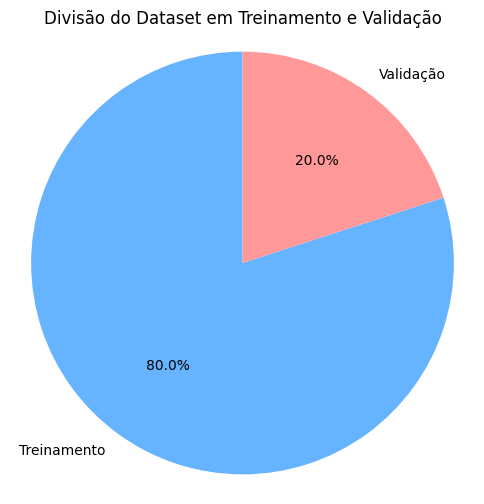

In [ ]:
import matplotlib.pyplot as plt

# Dados da divisão do dataset
train_size = 1280000
val_size = 320000

# Criar os rótulos e valores para o gráfico
labels = ['Treinamento', 'Validação']
sizes = [train_size, val_size]

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.axis('equal')  # Assegura que o gráfico será desenhado como um círculo
plt.title('Divisão do Dataset em Treinamento e Validação')

# Exibir o gráfico
plt.show()


**3 - Conclusões**

O pré-processamento realizado neste trabalho foi fundamental para transformar os dados brutos em um formato adequado para análise por meio de redes neurais convolucionais ou outras abordagens supervisionadas. Todas as etapas realizadas foram baseadas na premissa de que os padrões linguísticos presentes nos textos podem ser extraídos de maneira mais eficaz após a aplicação de técnicas robustas de pré-processamento.

Além disso, partimos da hipótese de que a qualidade do pré-processamento tem impacto direto no desempenho futuro dos modelos. Ao garantir que os dados estejam devidamente limpos, tokenizados, convertidos e balanceados, o pré-processamento oferece uma base sólida para a construção de modelos de aprendizado supervisionado. A divisão dos dados entre treinamento e validação assegura que a modelagem futura será realizada de forma confiável e com dados balanceados.

Embora o escopo deste trabalho não inclua o treinamento dos modelos, as etapas executadas até aqui preparam o terreno para que futuras análises possam ser conduzidas com confiança. O pré-processamento adequado reduz o risco de ruído e melhora significativamente a eficiência e eficácia dos modelos de aprendizado, facilitando a extração de insights precisos dos dados textuais.

Com isso, o trabalho futuro de treinamento de modelos poderá focar diretamente em ajustar parâmetros e melhorar a precisão de classificação de sentimentos, uma vez que os dados foram rigorosamente preparados e organizados.



Muito obrigado,

**Wagner Vieira Lopes**

